# Quick view of my images
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : 9 juin 2021
- kernel : anaconda3_auxtel
- update : July 22th 2021
- update : September 6th 2021 : View QuickLookExp



# Selection Flag

In [42]:
from astropy.io import fits
import sys, platform, os
#from astropy.visualization import simple_norm
#from astropy.visualization import imshow_norm, MinMaxInterval, SqrtStretch
import astropy.visualization  as aspv
from astropy.wcs import WCS
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import LogNorm

In [43]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord

In [44]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(12,12)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

# Work

In [45]:
#intputdir_day_1="/sps/lsst/groups/auxtel/data/2021/holo/localreduced/2021-07-07/"   
intputdir_day_1="/sps/lsst/groups/auxtel/data/2021/holo/quickLookExp/2021-07-07/"   
list_of_files=os.listdir(intputdir_day_1)    

In [46]:
print(list_of_files)

['holo4_003_empty_HD160617_20210707_000272_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000280_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000291_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000299_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000255_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000262_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000358_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000290_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000287_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000253_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000364_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000357_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000319_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000259_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000360_quickLookExp.fits', 'holo4_003_empty_HD160617_20210707_000324_quickLookExp.fits', 'holo4_

In [47]:
idx_file=30

In [48]:
fits_image_filename=list_of_files[idx_file]
full_fits_image_filename=os.path.join(intputdir_day_1,fits_image_filename)

In [49]:
fits_image_filename

'holo4_003_empty_HD160617_20210707_000330_quickLookExp.fits'

In [50]:
hdul = fits.open(full_fits_image_filename)

In [51]:
hdul.info()

Filename: /sps/lsst/groups/auxtel/data/2021/holo/quickLookExp/2021-07-07/holo4_003_empty_HD160617_20210707_000330_quickLookExp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Segment10     1 PrimaryHDU     124   (4072, 4000)   float32   


In [52]:
image=hdul[0].data
header=hdul[0].header

In [53]:
image.shape

(4000, 4072)

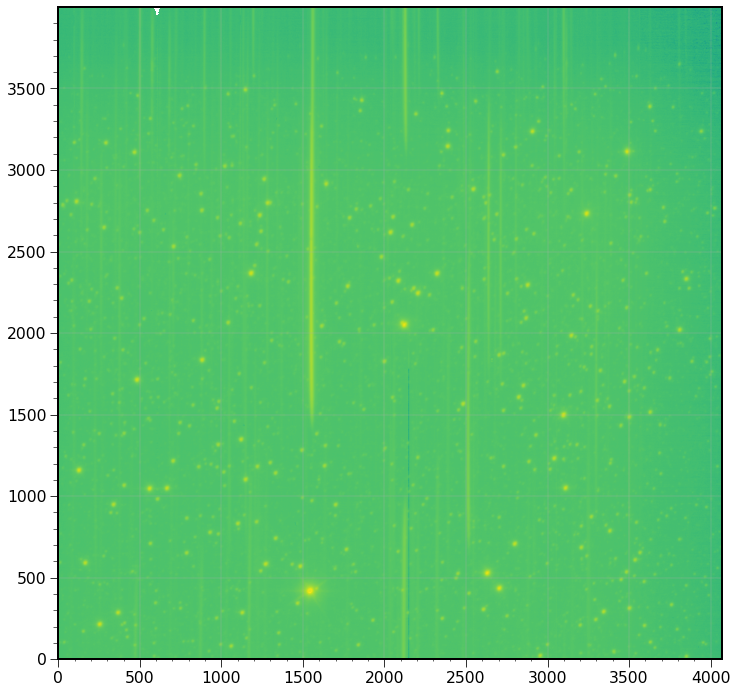

In [54]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(1,1,1)

ax.imshow(image,origin="lower",norm=LogNorm())

ax.minorticks_on()
ax.grid()

# Target

In [55]:
target_name="HD160617"

In [56]:
target_coord=SkyCoord.from_name(target_name)
target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (265.705515, -40.32097381)>

# View in WCS

Set OBSGEO-B to   -30.244639 from OBSGEO-[XYZ].
Set OBSGEO-H to     2659.990 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


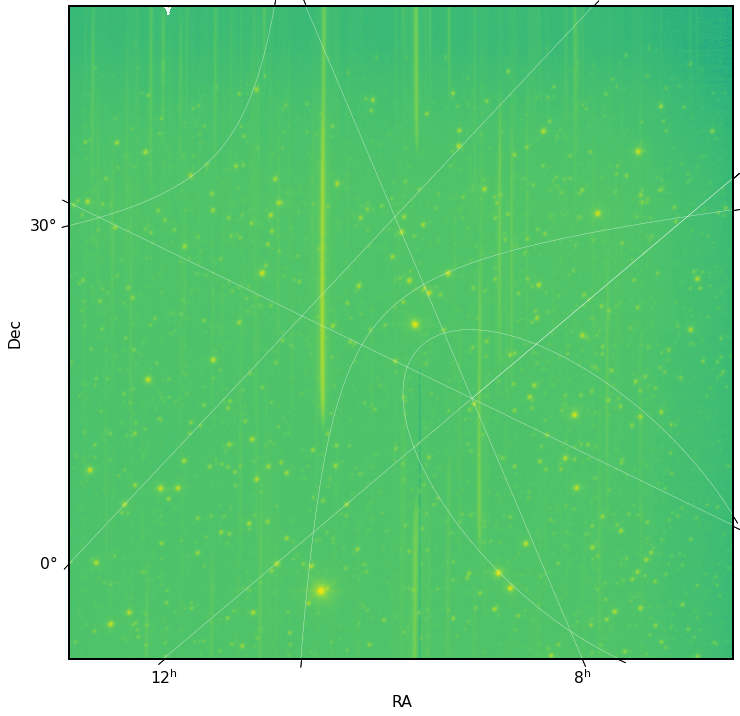

In [57]:
fig=plt.figure(figsize=(12,12))
wcs = WCS(header)
ax = plt.subplot(projection = wcs)

ax.imshow(image ,origin="lower",norm=LogNorm())
ax.grid(color='white', ls='solid')

ax.set_xlabel('RA')
ax.set_ylabel('Dec')

#overlay = ax.get_coords_overlay('icrs')
#overlay.grid(color='blue', ls='dotted')

In [58]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 265.705514583333  -40.3209736111111  
CRPIX : 2000.0  2036.0  
CD1_1 CD1_2  : 0.0719009611125575  0.0765196170343952  
CD2_1 CD2_2  : -0.0765196170343952  0.0719009611125575  
NAXIS : 4072  4000

In [59]:
target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (265.705515, -40.32097381)>

In [60]:
x,y=wcs.world_to_pixel(target_coord)

In [61]:
print(x,y)

1999.0000034521906 2035.000000907796


In [62]:
circle = plt.Circle((x, y), 50, color='r')

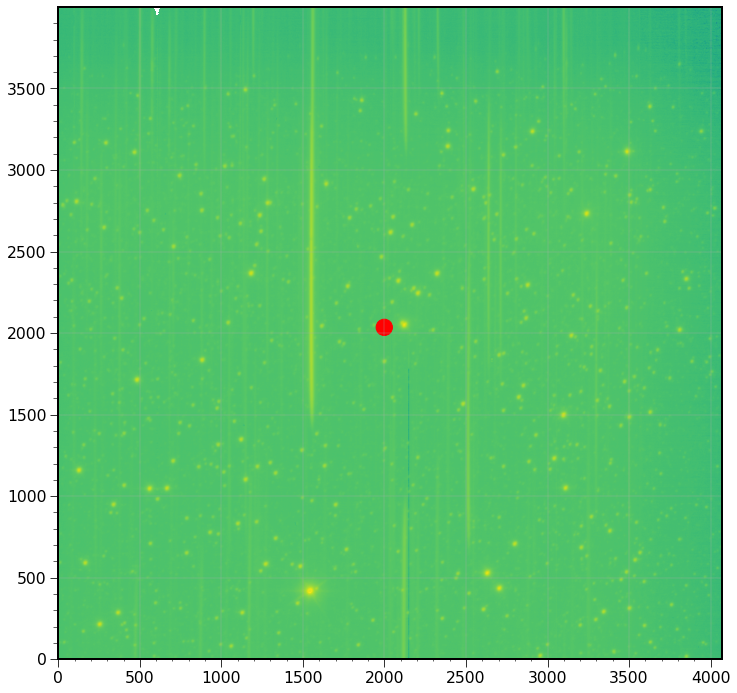

In [63]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(1,1,1)

ax.imshow(image,origin="lower",norm=LogNorm())
ax.add_patch(circle)
ax.minorticks_on()
ax.grid()